# Introduction

Airbnb is an online marketplace for short-term house and apartment rentals. It has two customer bases, owners and renters. Owners upload their property and renters approaches those owners. Airbnb is growing rapidly internationally and is worth more than any hospitility organization in the world.

Biggest challenge faced by Airbnb is to find the best price for a place which is rewarding for owners and cheaper for renters. So, Airbnb uses machine learning for predicting perfect price and give suggestions to users accordingly.

In this notebook, we will try to replicate the model used by Airbnb and understand the data science techniques used. We'll use Melbourne house prices dataset from kaggle(https://www.kaggle.com/anthonypino/melbourne-housing-market).

#### Problem

Predict the price of rental places based on other informations like number of room, landsize, area, etc.

### How to approach ML problems?

No matter what the problem is, but data science has same framework to follow for every problem. These are the steps to follow for solving the problem from higher view point:

1. EDA(Exploratory Data Analysis) and Data Cleaning
2. Feature Engineering
3. Feature Selection
4. Modeling
5. Model Evaluation
6. Conclusion for problem

## Let's start

We will need to use some python packages for playing with data, visualizations and creating models. Following packages will be enough for our case. 

1. pandas: Used for storing and playing with data using DataFrame
2. numpy: Used for working with arrays in python
3. matplotlib, seaborn: Used for plotting graphs from data
4. scikit-learn: Used for creating ML models 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline

In [2]:
df = pd.read_csv("/home/aubergine/Downloads/melbourne-housing/MELBOURNE_HOUSE_PRICES_LESS.csv")
full_df = pd.read_csv("/home/aubergine/Downloads/melbourne-housing/Melbourne_housing_FULL.csv")

# EDA and Data cleaning

EDA stands for Exploratory Data Analysis, i.e. analysis of data giving us some insights of how data is structured. This step is most important as we have just started to understand the data at hand.

Data cleaning comes after having insights on data.

Now, let's look into imported data. Our data contains following columns:

1. Suburb
2. Address
3. Rooms
4. Type
5. Price
6. Method
7. SellerG
8. Date
9. Postcode
10. Regionname
11. Propertycount
12. Distance
13. CouncilArea

Most of these columns are string with no effect on price of the house. So, our first step will be to remove such fields and convert categorical fields into numeric fields.

In [3]:
df.head()

Suburb           Address  Rooms Type      Price Method   SellerG  \
0    Abbotsford     49 Lithgow St      3    h  1490000.0      S    Jellis   
1    Abbotsford     59A Turner St      3    h  1220000.0      S  Marshall   
2    Abbotsford     119B Yarra St      3    h  1420000.0      S    Nelson   
3    Aberfeldie        68 Vida St      3    h  1515000.0      S     Barry   
4  Airport West  92 Clydesdale Rd      2    h   670000.0      S    Nelson   

        Date  Postcode             Regionname  Propertycount  Distance  \
0  1/04/2017      3067  Northern Metropolitan           4019       3.0   
1  1/04/2017      3067  Northern Metropolitan           4019       3.0   
2  1/04/2017      3067  Northern Metropolitan           4019       3.0   
3  1/04/2017      3040   Western Metropolitan           1543       7.5   
4  1/04/2017      3042   Western Metropolitan           3464      10.4   

                  CouncilArea  
0          Yarra City Council  
1          Yarra City Council  
2          Yarra City Council  
3  Moonee Valley City Council  
4  Moonee Valley City Council

In [4]:
df["Suburb"].value_counts()

Reservoir            1241
Bentleigh East        845
Mount Waverley        831
Richmond              822
Glen Waverley         819
                     ... 
Warneet                 1
Kalorama                1
Yarra Junction          1
Warrandyte South        1
Lysterfield South       1
Name: Suburb, Length: 380, dtype: int64

In [5]:
df["Regionname"].value_counts()

Southern Metropolitan         17559
Northern Metropolitan         16781
Western Metropolitan          11717
Eastern Metropolitan          10396
South-Eastern Metropolitan     5212
Eastern Victoria                564
Northern Victoria               556
Western Victoria                238
Name: Regionname, dtype: int64

In [6]:
df["CouncilArea"].value_counts()

Boroondara City Council           5132
Darebin City Council              4182
Banyule City Council              3656
Monash City Council               3592
Bayside City Council              3331
Brimbank City Council             3296
Moreland City Council             3030
Hume City Council                 2939
Glen Eira City Council            2934
Melbourne City Council            2728
Whittlesea City Council           2545
Moonee Valley City Council        2512
Kingston City Council             2378
Manningham City Council           2225
Maribyrnong City Council          2083
Stonnington City Council          1991
Whitehorse City Council           1811
Port Phillip City Council         1771
Yarra City Council                1698
Wyndham City Council              1542
Maroondah City Council            1451
Hobsons Bay City Council          1351
Knox City Council                 1043
Greater Dandenong City Council     948
Frankston City Council             835
Melton City Council      

In [7]:
full_df.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

We can check metadata regarding different columns of the DataFrame using .info() method. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
Suburb           63023 non-null object
Address          63023 non-null object
Rooms            63023 non-null int64
Type             63023 non-null object
Price            48433 non-null float64
Method           63023 non-null object
SellerG          63023 non-null object
Date             63023 non-null object
Postcode         63023 non-null int64
Regionname       63023 non-null object
Propertycount    63023 non-null int64
Distance         63023 non-null float64
CouncilArea      63023 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [9]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [10]:
full_df["Car"].value_counts()

2.0     12214
1.0      9164
0.0      1631
3.0      1606
4.0      1161
5.0       151
6.0       140
7.0        25
8.0        23
10.0        6
9.0         3
11.0        2
26.0        1
12.0        1
18.0        1
Name: Car, dtype: int64

Use .describe() for getting different statistical values of numerical fields. These statistical values are important for cleaning purposes.

### Outliers

In our data, there are some values higher than others. These values affect statistical values and create bias. These are called outliers. The best practice is to remove such outliers before training model.

We can use .describe() for finding outliers. First, see the mean of DataFrame which is average value from whole dataset. Percentile values lets us find the threshold for removing outliers.

In [11]:
df.describe()

Rooms         Price      Postcode  Propertycount      Distance
count  63023.000000  4.843300e+04  63023.000000   63023.000000  63023.000000
mean       3.110595  9.978982e+05   3125.673897    7617.728131     12.684829
std        0.957551  5.934989e+05    125.626877    4424.423167      7.592015
min        1.000000  8.500000e+04   3000.000000      39.000000      0.000000
25%        3.000000  6.200000e+05   3056.000000    4380.000000      7.000000
50%        3.000000  8.300000e+05   3107.000000    6795.000000     11.400000
75%        4.000000  1.220000e+06   3163.000000   10412.000000     16.700000
max       31.000000  1.120000e+07   3980.000000   21650.000000     64.100000

Remove null rows from data frame.

In [12]:
df = df.dropna()
full_df = full_df.dropna()

In [13]:
df.shape

(48433, 13)

In [14]:
full_df["Price"] = full_df["Price"].astype("int32")

From data, it is clear that the difference between maximum value and 75th percentile is high and there should be some outliers. So we remove outliers which are priced above 2500000.

In [15]:
full_df = full_df[full_df["Price"]<2500000.0]

### Visualizations

EDA is not complete without visualizations. As compared to statistical values, plots gives lot more information and shows us patterns in data.

Visualization is great tool before Feature Engineering step.

In [16]:
sns.set_style("darkgrid")

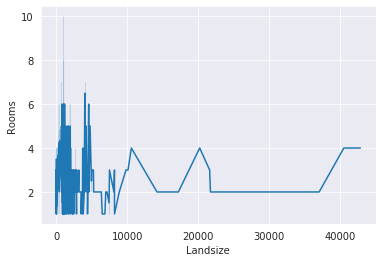

In [17]:
sns.lineplot(full_df["Landsize"], full_df["Rooms"])

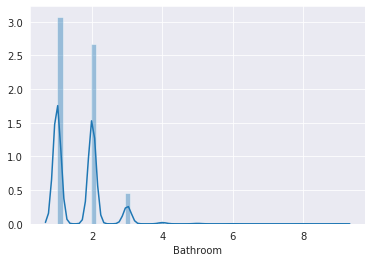

In [18]:
sns.distplot(full_df[full_df['Bathroom']<50]["Bathroom"])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48433 entries, 0 to 63020
Data columns (total 13 columns):
Suburb           48433 non-null object
Address          48433 non-null object
Rooms            48433 non-null int64
Type             48433 non-null object
Price            48433 non-null float64
Method           48433 non-null object
SellerG          48433 non-null object
Date             48433 non-null object
Postcode         48433 non-null int64
Regionname       48433 non-null object
Propertycount    48433 non-null int64
Distance         48433 non-null float64
CouncilArea      48433 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 5.2+ MB


In [20]:
df.describe()

Rooms         Price      Postcode  Propertycount      Distance
count  48433.000000  4.843300e+04  48433.000000   48433.000000  48433.000000
mean       3.071666  9.978982e+05   3123.210332    7566.399913     12.702761
std        0.944708  5.934989e+05    125.534940    4457.405884      7.550030
min        1.000000  8.500000e+04   3000.000000      39.000000      0.000000
25%        2.000000  6.200000e+05   3051.000000    4280.000000      7.000000
50%        3.000000  8.300000e+05   3103.000000    6567.000000     11.700000
75%        4.000000  1.220000e+06   3163.000000   10412.000000     16.700000
max       31.000000  1.120000e+07   3980.000000   21650.000000     55.800000

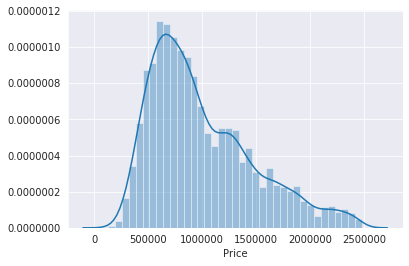

In [21]:
sns.distplot(full_df['Price'])

#### Violin plot

Violin plot is used for checking statistics of data visually. It is also helpful at identifying outliers more precisely compared to numerical values. EDA is not complete unless some information is retrieved from the visualizations.

Below plot is giving following insights for the data:

1. Southern Metropolitan is most expensive area
2. Western Victoria is cheapest area
3. Southern Metropolitan has biggest Price range
4. Region pays important role in predicting the Price

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

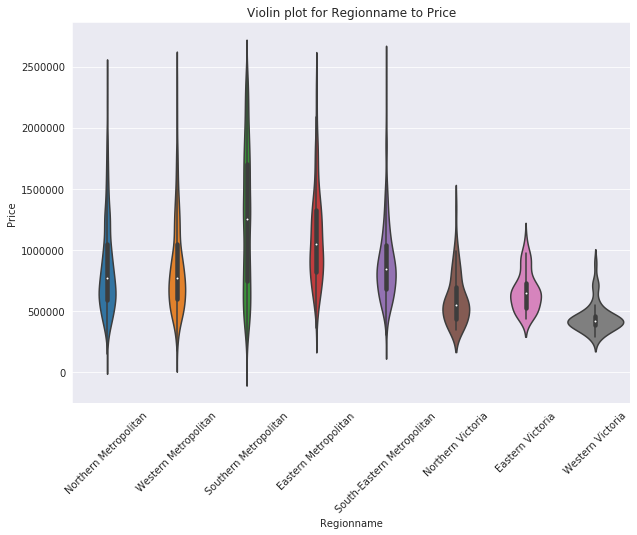

In [22]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.violinplot(full_df['Regionname'], full_df['Price'])
plt.title("Violin plot for Regionname to Price")
plt.xticks(rotation=45)

Again checking violin plot with Type of room against Price. Same as Regionname graph, h Type is most expensive following t Type and then u Type of rooms.

Text(0.5, 1.0, 'Violin plot for Type to Price')

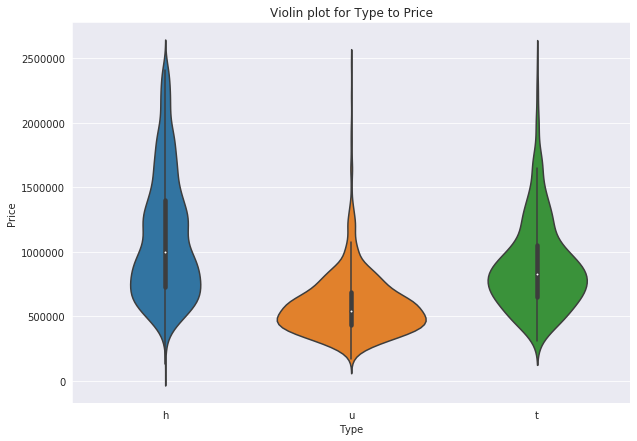

In [23]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.violinplot(full_df['Type'], full_df['Price'])
plt.title("Violin plot for Type to Price")

#### Scatter plot

Our data is related to city, so we can plot city based on Lattitude and Longitude provided in dataset. These plots give more idea related to which area of the city is more expensive in terms of visuals.

In below graph dark dots are Priced higher than light dots. Size of the dot represents the Landsize. Center of city has expensive places than others.

Text(0.5, 1.0, 'Lattitude to Longitude with Price and Landsize')

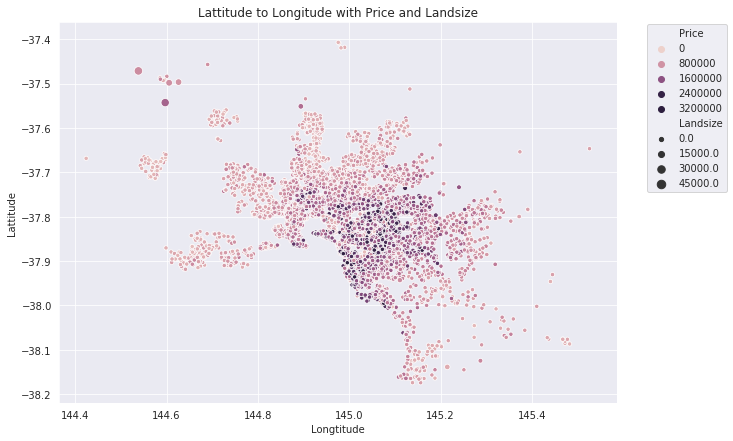

In [24]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.scatterplot(full_df["Longtitude"], full_df["Lattitude"], hue=full_df["Price"], size=full_df["Landsize"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
plt.title("Lattitude to Longitude with Price and Landsize")

Most of the rooms have Type h in whole city and other Types are also distributed across the data.

Text(0.5, 1.0, 'Lattitude to Longitude for Type of room')

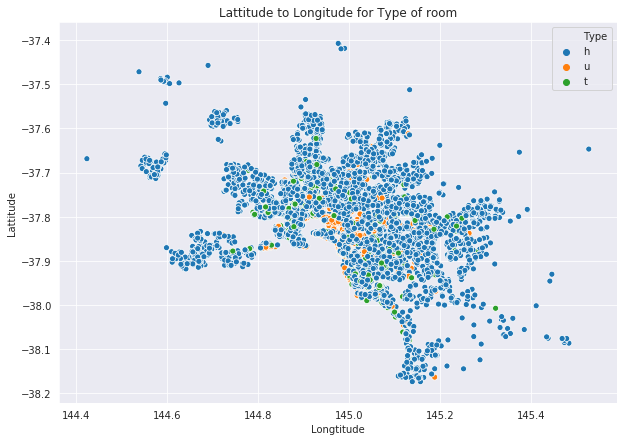

In [25]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.scatterplot(full_df["Longtitude"], full_df["Lattitude"], hue=full_df["Type"])
plt.title("Lattitude to Longitude for Type of room")

Below graph is showing all the regionnames of data visually. Southern Metropolitan is in the center of city. Comparing this plot with first plot says that Southern Metropolitan has most expensive places in whole city. This information was also provided by violin plot.

Text(0.5, 1.0, 'Lattitude to Longitude for Regionname')

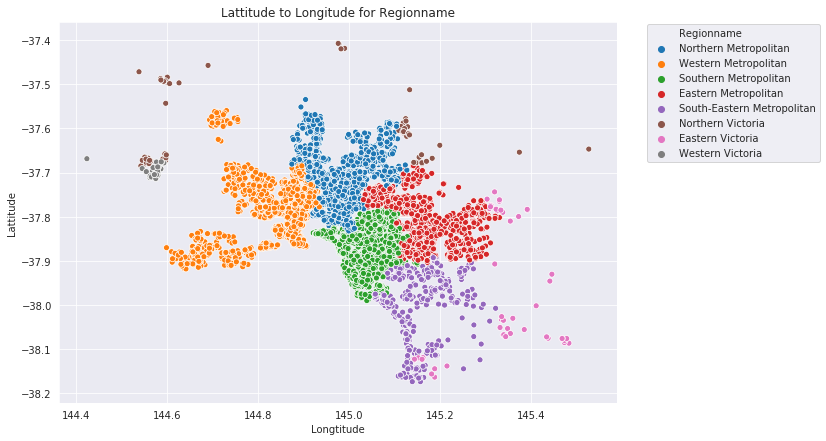

In [26]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.scatterplot(full_df["Longtitude"], full_df["Lattitude"], hue=full_df["Regionname"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
plt.title("Lattitude to Longitude for Regionname")

#### Heatmap

Heat map is checking correlation between features of dataframe. This helps us find out which of the fields are dependent on each other and this dependence could be used in feature selection.

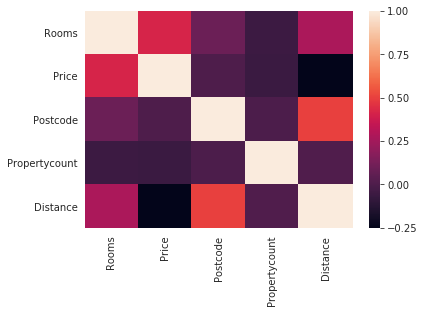

In [27]:
sns.heatmap(df.corr())

#### Boxplot

Boxplot is same as violin plot but with different visuals. It is used for looking statistical data and outliers of data. Boxplot is more easy to understand compared to Violinplot.

Box in graph represents following statistics in visual:

1. Minimum of data
2. 25th Percentile
3. Mean
4. 75th Percentile
5. Maximum of data
6. Dots above that line are Outliers(Having values 3 times more than interquartile range)

For more information, take a look at this(http://www.physics.csbsju.edu/stats/box2.html)

Text(0.5, 1.0, 'Box plot for Price')

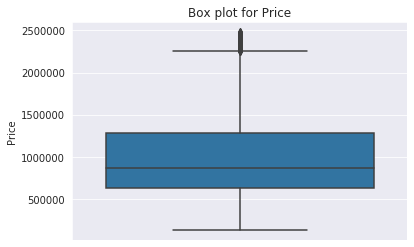

In [28]:
sns.boxplot(y=full_df[full_df["Price"]<2500000.0]["Price"]) 
plt.title("Box plot for Price")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48433 entries, 0 to 63020
Data columns (total 13 columns):
Suburb           48433 non-null object
Address          48433 non-null object
Rooms            48433 non-null int64
Type             48433 non-null object
Price            48433 non-null float64
Method           48433 non-null object
SellerG          48433 non-null object
Date             48433 non-null object
Postcode         48433 non-null int64
Regionname       48433 non-null object
Propertycount    48433 non-null int64
Distance         48433 non-null float64
CouncilArea      48433 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 5.2+ MB


# Feature Engineering

Process of Feature Engineering is important for high accuracy of prediction model. Good features increases the probability of high accuracy but bad features could also create load on machine and decrease accuracy. Selected features should be related to label of dataset. More relation with data means high accuracy. 

Further, feature engineering includes converting data into more computation friendly format. Categorical data is converted into numerical form, dates are converted into timestamp, string features should be removed and strings should be converted to numbers.

In [30]:
df = pd.concat([df, pd.get_dummies(df["Type"]), pd.get_dummies(df["Method"]), pd.get_dummies(df["Regionname"])], axis=1)

In [31]:
df = df.drop(["Suburb", "Address", "SellerG", "CouncilArea", "Type", "Method", "Regionname"], 1)

In [32]:
df['Date'] = [pd.Timestamp(x).timestamp() for x in df["Date"]]

In [33]:
df = df.dropna()

# Feature Selection

After the features are generated, the dataset should split into train-test datasets with 80/20 ratio. Splitting is helpful in evaluating the performance of model. We can't test the model on train data because model has already worked with that data. But test data could be considered as real world data for model and it's accuracy could be considered more reliable than train data scores.

In [34]:
df.head()

Rooms      Price          Date  Postcode  Propertycount  Distance  h  t  u  \
0      3  1490000.0  1.483488e+09      3067           4019       3.0  1  0  0   
1      3  1220000.0  1.483488e+09      3067           4019       3.0  1  0  0   
2      3  1420000.0  1.483488e+09      3067           4019       3.0  1  0  0   
3      3  1515000.0  1.483488e+09      3040           1543       7.5  1  0  0   
4      2   670000.0  1.483488e+09      3042           3464      10.4  1  0  0   

   PI  ...  SP  VB  Eastern Metropolitan  Eastern Victoria  \
0   0  ...   0   0                     0                 0   
1   0  ...   0   0                     0                 0   
2   0  ...   0   0                     0                 0   
3   0  ...   0   0                     0                 0   
4   0  ...   0   0                     0                 0   

   Northern Metropolitan  Northern Victoria  South-Eastern Metropolitan  \
0                      1                  0                           0   
1                      1                  0                           0   
2                      1                  0                           0   
3                      0                  0                           0   
4                      0                  0                           0   

   Southern Metropolitan  Western Metropolitan  Western Victoria  
0                      0                     0                 0  
1                      0                     0                 0  
2                      0                     0                 0  
3                      0                     1                 0  
4                      0                     1                 0  

[5 rows x 22 columns]

In [35]:
X = df.drop("Price", 1)
Y = df["Price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

# Modeling

Modeling is the part where all the above sections will be used and quality of data will be tested. Our problem is for Regressor models and we are using regressors from scikit-learn for prediction. Training data is used for training the model and testing data could be used for testing the model. For finding optimal model, we'll train multiple models and find their train-test accuracy and then select best performing model. We are using following models:
1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting Regressor
We should try Hyperparameter Tuning to increase accuracy of model.

### Hyperparameter Tuning

Models have parameters which affect the way model approaches data. All the algorithms have multiple types of parameters suitable for different types of data. Better tuning increases accuracy and vice-versa. There are functions like GridSearchCV for finding optimal hyperparameters. GridSearchCV required grid of parameters to iterate the model with and returning highest accuracy parameters in output. You need to be careful while tuning hyperparameters as this can lead to overfitting or underfitting.

### Understanding Overfitting vs Underfitting

##### Overfitting

Overfitting means the model is closely trained on training data and will fail when predicting real data. This problem could be ignored if model is not tested carefully. In solution for this, model must be evaluated with testing data.

##### Underfitting

Underfitting means model is not giving any accuracy on both datasets.

# Evaluation

There are multiple parameters for evaluating our model based on the label of dataset. Categorical labels have different ways of evaluation whereas Regression have different evaluations. Following methods are used for evaluation with Regression:

1. R^2 Score
2. Root Mean Square Error (RMSE)
3. Mean Absolute Error (MAE)
4. AUC-ROC curve
5. Confidence interval

We are using some of these techniques for evaluation with train-test datasets.

### Cross Validation

Cross validation is part of evaluation. It divides data into multiple chunks and then test the model on these data chunks randomly.

In [36]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
print("Linear Regression R^2 Score: ", lr.score(X_train, Y_train))
print("Linear Regression Test R^2 Score: ", lr.score(X_test, Y_test))
y_pred = lr.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(y_pred, Y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_pred, Y_test))
print("Cross Validation Score: ", cross_val_score(lr, X_test, Y_test, cv=5))

Linear Regression R^2 Score:  0.5250089762998389
Linear Regression Test R^2 Score:  0.5404214731185564
Mean Squared Error:  157931461845.94528
Mean Absolute Error:  266843.2787417691
Cross Validation Score:  [0.53332641 0.55884646 0.54446749 0.54538732 0.52128314]


In [37]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=5, n_jobs=-1, random_state=12)
rfr.fit(X_train, Y_train)
print("Random Forest R^2 Score: ", rfr.score(X_train, Y_train))
print("Random Forest Test R^2 Score: ", rfr.score(X_test, Y_test))
y_pred = rfr.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(y_pred, Y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_pred, Y_test))
print("Cross Validation Score: ", cross_val_score(rfr, X_test, Y_test, cv=5))

Random Forest R^2 Score:  0.6227170193082325
Random Forest Test R^2 Score:  0.6356319053898662
Mean Squared Error:  125212955927.86676
Mean Absolute Error:  228672.22991679842
Cross Validation Score:  [0.62739053 0.68126382 0.6314845  0.65570291 0.63639415]


In [47]:
gbr = GradientBoostingRegressor(n_estimators=1000, max_depth=5, random_state=22)
gbr.fit(X_train, Y_train)
print("Gradient Boosting R^2 Score: ", gbr.score(X_train, Y_train))
print("Gradient Boosting Test R^2 Score: ", gbr.score(X_test, Y_test))
y_pred = gbr.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(y_pred, Y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_pred, Y_test))
print("Cross Validation Score: ", cross_val_score(gbr, X_test, Y_test, cv=5))

Gradient Boosting R^2 Score:  0.8365617273791319
Gradient Boosting Test R^2 Score:  0.7376430474452103
Mean Squared Error:  90157426030.29402
Mean Absolute Error:  175794.75657571782
Cross Validation Score:  [0.696955   0.72916536 0.70555834 0.67987821 0.68618422]


Gradient Boosting is highest performing model amongst all used with accuracy of 84% on training dataset and 72% on testing dataset. We use GridSearchCV for hyperparameter tuning of our model parameters. 

In [43]:
X_train.columns

Index(['Rooms', 'Date', 'Postcode', 'Propertycount', 'Distance', 'h', 't', 'u',
       'PI', 'S', 'SA', 'SP', 'VB', 'Eastern Metropolitan', 'Eastern Victoria',
       'Northern Metropolitan', 'Northern Victoria',
       'South-Eastern Metropolitan', 'Southern Metropolitan',
       'Western Metropolitan', 'Western Victoria'],
      dtype='object')

In [48]:
gbr.feature_importances_

array([1.93030592e-01, 3.71634078e-02, 8.16263345e-02, 3.98189340e-02,
       2.13854281e-01, 1.98739217e-01, 3.15037346e-03, 1.87651821e-02,
       3.33624616e-03, 3.28009351e-03, 6.03869194e-04, 1.26960219e-03,
       3.26145917e-03, 3.43105495e-02, 1.03666528e-04, 1.11228067e-03,
       1.67594453e-04, 7.59542210e-03, 1.58656819e-01, 1.18686652e-04,
       3.53886387e-05])

In [49]:
pd.DataFrame(X_train.columns, gbr.feature_importances_)

0
0.193031                       Rooms
0.037163                        Date
0.081626                    Postcode
0.039819               Propertycount
0.213854                    Distance
0.198739                           h
0.003150                           t
0.018765                           u
0.003336                          PI
0.003280                           S
0.000604                          SA
0.001270                          SP
0.003261                          VB
0.034311        Eastern Metropolitan
0.000104            Eastern Victoria
0.001112       Northern Metropolitan
0.000168           Northern Victoria
0.007595  South-Eastern Metropolitan
0.158657       Southern Metropolitan
0.000119        Western Metropolitan
0.000035            Western Victoria

Distance, Room type 'h' and Rooms are most important features which affect our Gradient Boosting model.

In [39]:
params = {'n_estimators':[500, 1000, 1500, 2000], 'max_depth':[3, 5, 8]}
gbr = GradientBoostingRegressor()
gbr_grid = GridSearchCV(gbr, params, cv=5)
gbr_grid.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [40]:
gbr_grid.score(X_train, Y_train)

0.7747429818242477

In [41]:
gbr_grid.score(X_test, Y_test)

0.7473734706806072

In [42]:
gbr_grid.best_params_

{'max_depth': 3, 'n_estimators': 1500}

GridSearchCV found best parameters for Gradient Boosting with 77% training accuracy and 75% testing accuracy.

### K Nearest Neighbors

K nearest nighbors could be used for such problems as price of surrounding places will mostly be responsible for the price. 

Evaluating KNN shows that it's clearly overfitting and the data is not suitable for such.

In [50]:
knr = KNeighborsRegressor(weights='distance', n_neighbors=200)
knr.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=200, p=2,
                    weights='distance')

In [51]:
knr.score(X_train, Y_train)

0.9741312549175164

In [52]:
knr.score(X_test, Y_test)

0.20550879680399137

# Conclusion

In conclusion, Gradient Boosting is most accurate model with this dataset. We learned that Distance, Rooms and Type of room are important factors price of place.